# ATMO 5331 HW 4
# Grant McKercher
# November 10, 2015

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

def dB(a,base=1.0): # this function is from "Basic-window-response" by Eric Bruning
    return 10.0*np.log10(a/base)

## Number 1
### Making windows 

In [2]:
N = 1001 # sample size
dt = .2 
fs = 1.0/dt
f_nyq = 0.5*fs # Nyquist frequency = 2.5 Hz
t = np.arange(N)*dt
fftshift = np.fft.fftshift
phase = 0.0
h = np.sin(t+phase) # used in Eric Bruning's "Basic-window-response"
myfreq = np.fft.fftfreq(N, 0.005)

In [3]:
def poisson_w(n):
    '''n-point poisson window from Harris (1978, IEEE)'''
    n = int(n)
    d = np.arange(n) - ((n-1)/2.0)
    d -= (d[-1] + d[0])/2.0 # Make symmetric in event of even n
    w = np.exp(-2.0*(np.abs(d)/(n/2)))
    return w

In [4]:
# choosing 3 window functions
bar = signal.get_window('bartlett',N)
par = signal.get_window('parzen',N)
poi = poisson_w(N) # I made this!

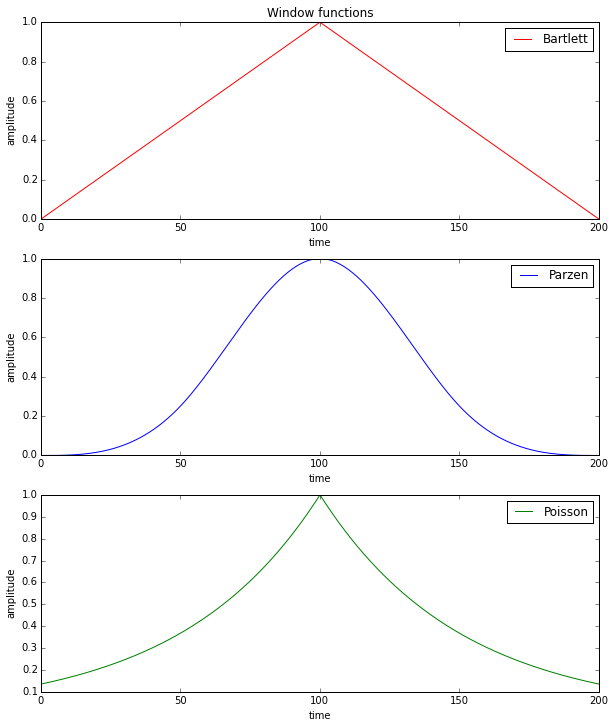

In [5]:
# plotting the windows
fig = plt.figure(figsize=(10,12))
ax_1 = fig.add_subplot(311)
ax_1.set_title('Window functions')
ax_1.plot(t,bar,label='Bartlett',c='r')
ax_1.set_xlabel('time')
ax_1.set_ylabel('amplitude')
ax_1.legend()
ax_2 = fig.add_subplot(312)
ax_2.plot(t,par,label='Parzen',c='b')
ax_2.set_xlabel('time')
ax_2.set_ylabel('amplitude')
ax_2.legend()
ax_3 = fig.add_subplot(313)
ax_3.plot(t,poi,label='Poisson',c='g')
ax_3.set_xlabel('time')
ax_3.set_ylabel('amplitude')
ax_3.legend()

### Calculating frequency where there would be 50% and 99% reduction in amplitude

In [6]:
def find_close(window):
    '''Function that finds the closest point on the 
    x-axis that has a y value close to 0.5 or 0.01'''
    close50 = min(window, key=lambda x:abs(x-0.5))
    close99 = min(window, key=lambda x:abs(x-0.01))
    
    '''Statement to alert me to change the index by 1.
    We dont want the index above 50 or 99%, instead we
    want the first index with amplitude below 50 or 99%'''
    if close50 > 0.5:
        print "sub one from first 50 index"
    if close99 > 0.01:
        print "sub one from first 99 index"

    for i in range(N):
        if window[i] == close50:
            print 'index50 =',i

    for j in range(N):
        if window[j] == close99:
            print 'index90 =',j

### Bartlett Window

In [7]:
# now we calculate fft to get from time to frequency domain
fft_w_bar = np.fft.fft(bar/bar.sum(), h.shape[0])
bar_amp = (np.abs(fftshift(fft_w_bar)))
bar_ph = np.degrees(np.angle(fftshift(fft_w_bar)))
F = fftshift(myfreq)
find_close(bar_amp) # print out indecies where there is 50/99 percent reduction

index50 = 499
index50 = 501
index90 = 507


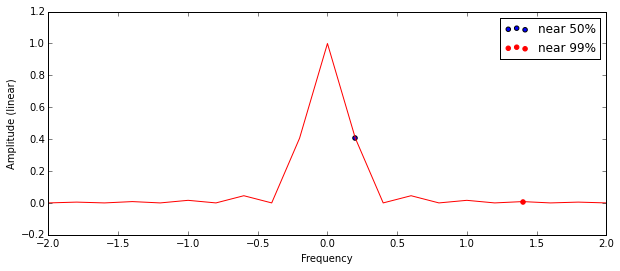

In [8]:
plt.figure(figsize=(10,4))
plt.plot(F, bar_amp,c='r')
plt.xlim(-2,2)
plt.xlabel('Frequency')
plt.ylabel('Amplitude (linear)')
plt.scatter(F[501],(bar_amp[501]),label='near 50%')
plt.scatter(F[507],(bar_amp[507]),color='r',label='near 99%')
#plt.scatter(F[500],(bar_amp[500]),color='g',label='>50%')
plt.legend()

#### NOTE: the annotations on each graph are plotted on one side of zero; however, since the plots are symmetric, the value with the opposite sign on the x-axis is also a value at which it is true. This is the case for all of my annotated plots. For example: in the plot above, the amplitude at index 501 is the value nearest 50% (0.5) of the reduction from 1.0. The amplitude at index 499 also shares the same value. 

In [9]:
# using the same indecies from above, printing the amplitudes
print 'amp near 50% =', bar_amp[501]
print 'amp near 99% =', bar_amp[507]

# finding the dB values at the associated amplitudes
print 'dB near 50% =', dB(bar_amp)[501]
print 'dB near 99% =',dB(bar_amp)[507]

amp near 50% = 0.406096042657
amp near 99% = 0.00828800087859
dB near 50% = -3.91371242622
dB near 99% = -20.8155021156


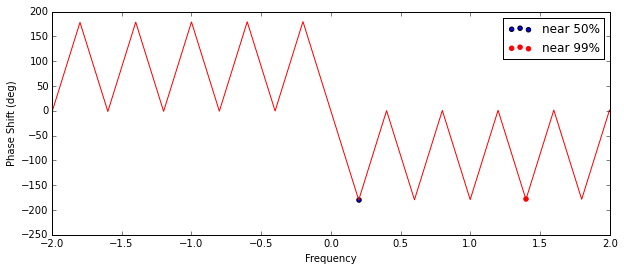

In [10]:
plt.figure(figsize=(10,4))
plt.plot(F, bar_ph,c='r')
plt.xlim(-2,2)
plt.xlabel('Frequency')
plt.ylabel('Phase Shift (deg)')
plt.scatter(F[501],(bar_ph[501]),label='near 50%')
plt.scatter(F[507],(bar_ph[507]),color='r',label='near 99%')
#plt.scatter(F[500],(bar_ph[500]),color='g',label='>50%')
plt.legend()

### Parzen Window

In [11]:
# now we calculate fft to get from time to frequency domain
fft_w_par = np.fft.fft(par/par.sum(), h.shape[0])
par_amp = (np.abs(fftshift(fft_w_par)))
par_ph = np.degrees(np.angle(fftshift(fft_w_par)))
F = fftshift(myfreq)
find_close(par_amp) # print out indecies where there is 50/99 percent reduction

sub one from first 50 index
index50 = 499
index50 = 501
index90 = 497
index90 = 503


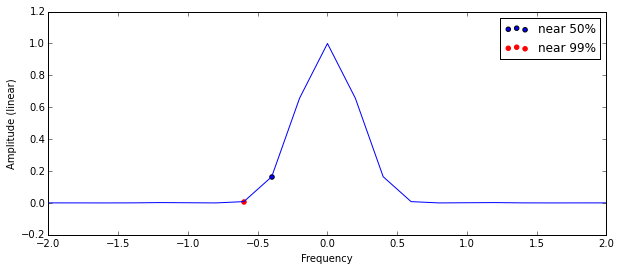

In [12]:
plt.figure(figsize=(10,4))
plt.plot(F, par_amp,c='b')
plt.xlim(-2,2)
plt.xlabel('Frequency')
plt.ylabel('Amplitude (linear)')
plt.scatter(F[498],(par_amp[498]),label='near 50%')
plt.scatter(F[497],(par_amp[497]),color='r',label='near 99%')
#plt.scatter(F[499],(par_amp[499]),color='g',label='>50%')
plt.legend()

In [13]:
# using the index from above, show the value in the freq domain
print 'amp near 50% =', par_amp[498]
print 'amp near 99% =', par_amp[497]

# finding the dB values at this point
print 'dB near 50% =', dB(par_amp)[498]
print 'dB near 99% =',dB(par_amp)[497]

amp near 50% = 0.164255716076
amp near 99% = 0.00811139338918
dB near 50% = -7.84479508118
dB near 99% = -20.9090453552


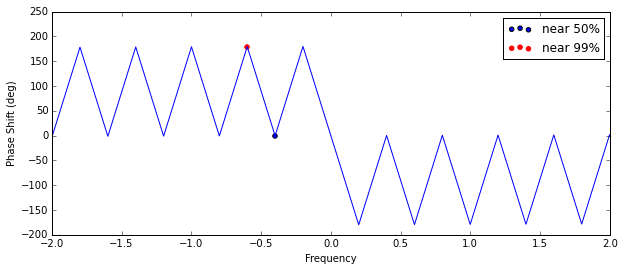

In [14]:
plt.figure(figsize=(10,4))
plt.plot(F, par_ph,c='b')
plt.xlim(-2,2)
plt.xlabel('Frequency')
plt.ylabel('Phase Shift (deg)')
plt.scatter(F[498],(par_ph[498]),label='near 50%')
plt.scatter(F[497],(par_ph[497]),color='r',label='near 99%')
#plt.scatter(F[499],(par_ph[499]),color='g',label='>50%')
plt.legend()

### Poisson Window

In [15]:
# now we calculate fft to get from time to frequency domain
fft_w_poi = np.fft.fft(poi/poi.sum(), h.shape[0])
poi_amp = (np.abs(fftshift(fft_w_poi)))
poi_ph = np.degrees(np.angle(fftshift(fft_w_poi)))
F = fftshift(myfreq)
find_close(poi_amp) # print out indecies where there is 50/99 percent reduction

sub one from first 99 index
index50 = 499
index50 = 501
index90 = 493
index90 = 507


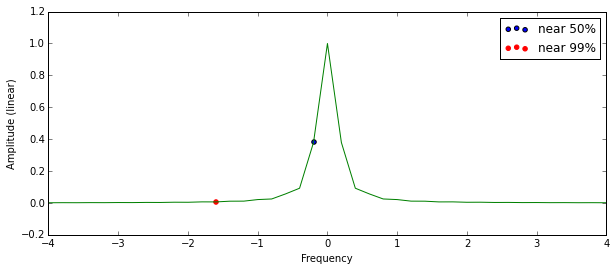

In [16]:
plt.figure(figsize=(10,4))
plt.plot(F, poi_amp,c='g')
plt.xlim(-4,4)
plt.xlabel('Frequency')
plt.ylabel('Amplitude (linear)')
plt.scatter(F[499],(poi_amp[499]),label='near 50%')
plt.scatter(F[492],(poi_amp[492]),color='r',label='near 99%')
#plt.scatter(F[500],(poi_amp[500]),color='g',label='>50%')
plt.legend()

In [17]:
# using the index from above, show the value in the freq domain
print 'amp near 50% =', poi_amp[499]
print 'amp near 99% =', poi_amp[492]

# finding the dB values at this point
print 'dB near 50% =', dB(poi_amp)[499]
print 'dB near 99% =',dB(poi_amp)[492]

amp near 50% = 0.379010819541
amp near 99% = 0.00630687266411
dB near 50% = -4.21348392143
dB near 99% = -22.0018593733


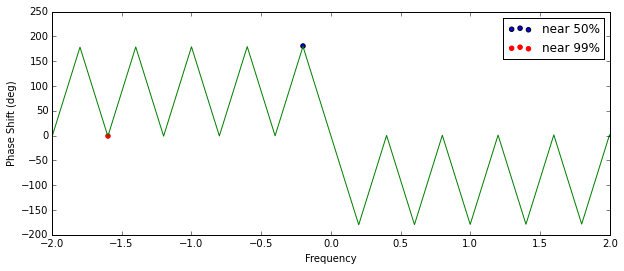

In [18]:
plt.figure(figsize=(10,4))
plt.plot(F, poi_ph,c='g')
plt.xlim(-2,2)
plt.xlabel('Frequency')
plt.ylabel('Phase Shift (deg)')
plt.scatter(F[499],(poi_ph[499]),label='near 50%')
plt.scatter(F[492],(poi_ph[492]),color='r',label='near 99%')
#plt.scatter(F[500],(poi_ph[500]),color='g',label='>50%')
plt.legend()

### Relative Differences between windows

#### The amplitude (in the frequency domain) differs in shape between each window function. The Bartlett and Poisson windows produces steep peaks in amplitude - as the window function itself has a sharp peak. The Parzen window's amplitude has a more gradual change in slope. Also, the Bartlett and Parzen peak amplitudes span a wider range of frequencies compared to the Poisson peak amplitude (this is seen from zooming in quite a bit). The poisson amplitude peak is comparitively narrow. 

#### The phase shift (also frequency domain) seems to be very similar between the window functions. However, the locations of the near 50% and near 99% reductions are different when comparing the windows. 

## Number 2

### Filtering the windows by padding with zeros ouside of the 99%

### Filtered Bartlett window

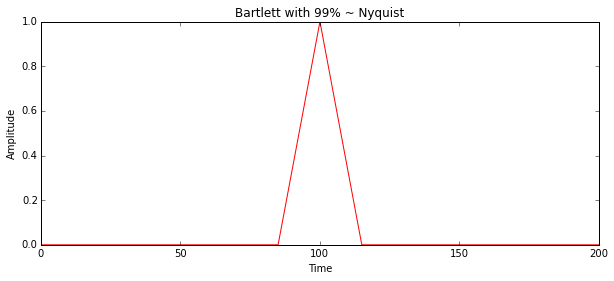

In [19]:
fbar = np.zeros(N)
fbar[425:575] = signal.get_window('bartlett',150) 

plt.figure(figsize=(10,4))
plt.title('Bartlett with 99% ~ Nyquist')
plt.plot(t,fbar,c='r')
plt.xlabel('Time')
plt.ylabel('Amplitude')

### Filtered Parzen Window

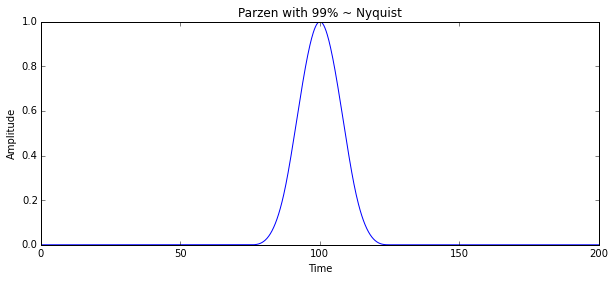

In [20]:
fpar = np.zeros(N)
fpar[375:625] = signal.get_window('parzen',250) 

plt.figure(figsize=(10,4))
plt.title('Parzen with 99% ~ Nyquist')
plt.plot(t,fpar)
plt.xlabel('Time')
plt.ylabel('Amplitude')

### Filtered Poisson Window

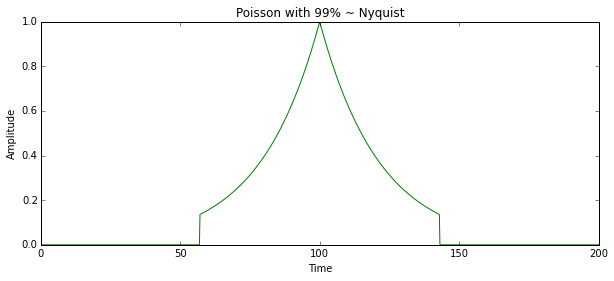

In [22]:
fpoi = np.zeros(N)
fpoi[285:715] = poisson_w(430) 

plt.figure(figsize=(10,4))
plt.title('Poisson with 99% ~ Nyquist')
plt.plot(t,fpoi,c='g')
plt.xlabel('Time')
plt.ylabel('Amplitude')

### Filter Comparison

In [23]:
# Switching to frequency domain
fft_w_fbar = np.fft.fft(fbar/fbar.sum(), h.shape[0])
fbar_amp = (np.abs(fftshift(fft_w_fbar)))
fbar_ph = np.degrees(np.angle(fftshift(fft_w_fbar)))
F = fftshift(myfreq)

fft_w_fpar = np.fft.fft(fpar/fpar.sum(), h.shape[0])
fpar_amp = (np.abs(fftshift(fft_w_fpar)))
fpar_ph = np.degrees(np.angle(fftshift(fft_w_fpar)))

fft_w_fpoi = np.fft.fft(fpoi/fpoi.sum(), h.shape[0])
fpoi_amp = (np.abs(fftshift(fft_w_fpoi)))
fpoi_ph = np.degrees(np.angle(fftshift(fft_w_fpoi)))

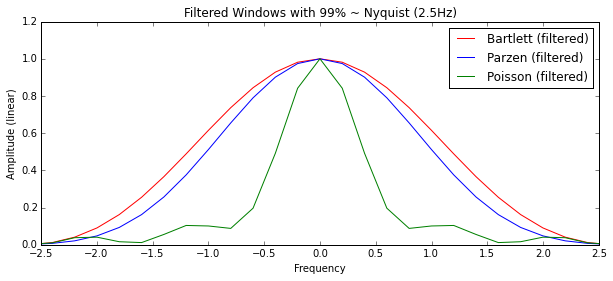

In [24]:
plt.figure(figsize=(10,4))
plt.plot(F, fbar_amp,c='r',label='Bartlett (filtered)')
plt.plot(F, fpar_amp,c='b',label='Parzen (filtered)')
plt.plot(F, fpoi_amp,c='g',label='Poisson (filtered)')
plt.xlim(-2.5,2.5)
plt.xticks(np.linspace(-2.5,2.5,11))
plt.title('Filtered Windows with 99% ~ Nyquist (2.5Hz)')
plt.xlabel('Frequency')
plt.ylabel('Amplitude (linear)')
plt.legend()

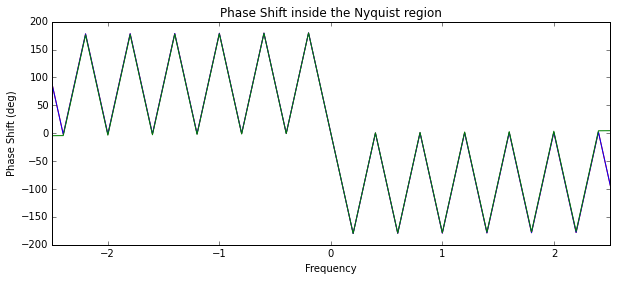

In [25]:
# note that the colors of these lines are the same for each window in each plot
plt.figure(figsize=(10,4))
plt.plot(F,fbar_ph,c='r') # Bartlett
plt.plot(F,fpar_ph,c='b') # Parzen
plt.plot(F,fpoi_ph,c='g') # Poisson
plt.xlim(-2.5,2.5)
plt.title('Phase Shift inside the Nyquist region')
plt.xlabel('Frequency')
plt.ylabel('Phase Shift (deg)')

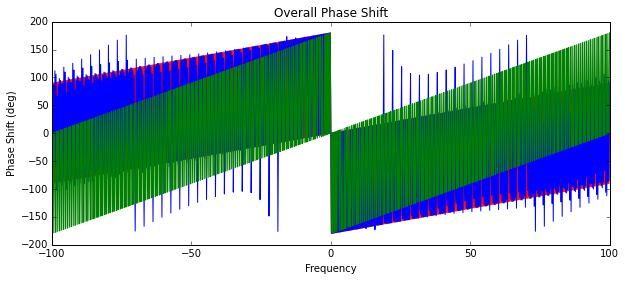

In [26]:
# This plot shows the phase shift over all frequencies for comparison purposes

# note that the colors of these lines are the same for each window in each plot
plt.figure(figsize=(10,4))
plt.plot(F,fbar_ph,c='r') # Bartlett
plt.plot(F,fpar_ph,c='b') # Parzen
plt.plot(F,fpoi_ph,c='g') # Poisson
#plt.xlim(-2.5,2.5)
plt.title('Overall Phase Shift')
plt.xlabel('Frequency')
plt.ylabel('Phase Shift (deg)')

#### The plot of amplitude vs. frequency for each of the filtered window functions (3 plots above) shows the performance of each filter. From this plot, I can observe that the Bartlett window filter performed the best because it has the widest curve - capturing most of the amplitudes within the -2.5,2.5 region (99% attenuation / Nyquist). The Poisson filter performed the worst because it has the steepest curve, not to mention some sidelobe features. 

In [27]:
def heaviside(x):
    '''Adapted from http://stackoverflow.com/a/15122658/554319
    and http://scicomp.stackexchange.com/questions/11477/plotting-discontinuous-functions'''
    y = 0.5 * (np.sign(x-(3*max(x)/4)) + 1) # aligning 3/4 of the way through the time series
    return y

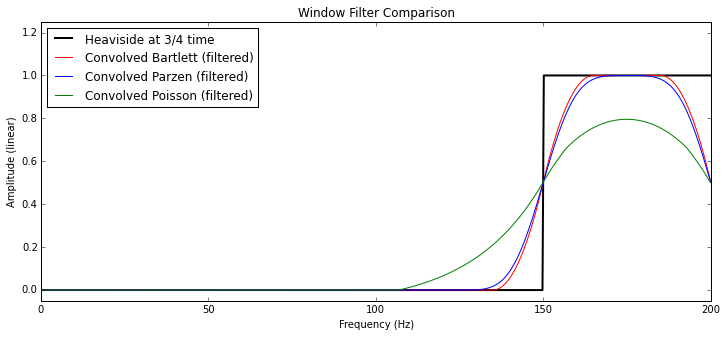

In [28]:
plt.figure(figsize=(12,5))
plt.title('Window Filter Comparison')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (linear)')

# making the heaviside step function 
x = np.linspace(0, 200, N)
hx = heaviside(x)
plt.plot(x,hx,c='black',linewidth=2,label='Heaviside at 3/4 time')
plt.ylim(-0.05, 1.25)

# convolving the heaviside and filtered Bartlett window
bar_x = signal.fftconvolve(hx, fbar / fbar.sum(), mode='same')
plt.plot(x,bar_x,c='r',label='Convolved Bartlett (filtered)')

# convolving the heaviside and filtered Parzen window
par_x = signal.fftconvolve(hx, fpar / fpar.sum(), mode='same')
plt.plot(x,par_x,c='b',label='Convolved Parzen (filtered)')

# convolving the heaviside and filtered Poisson window
poi_x = signal.fftconvolve(hx, fpoi / fpoi.sum(), mode='same')
plt.plot(x,poi_x,c='g',label='Convolved Poisson (filtered)')

plt.legend(loc='upper left')

#### It appears that the Bartlett filter has the best step response in comparison to a heaviside step function. The Parzen filter is very similar in shape to the Bartlett filter, but does not have as steep of a response. The Poisson filter has a comparatively poor step response. 